# 1. Get confidence curves
In this notebook we:
- Load the speech recognition data for each representation.
- We get a confidence curve and save for later processing.

## Setup

In [1]:
# Installs
import sys
!echo "Purging pip environment and installing packages..."
!{sys.executable} -m pip cache purge 
!{sys.executable} -m pip uninstall -y jhutils 
!{sys.executable} -m pip install -q git+https://github.com/jdchart/jh-py-utils.git

# Imports
print("Importing packages...")
import os
from jhutils.local_files import read_json, collect_files
import dps
import numpy as np
import utils
import pandas as pd
print("Ready!")

Purging pip environment and installing packages...
Files removed: 0
Found existing installation: jhutils 0.0.1
Uninstalling jhutils-0.0.1:
  Successfully uninstalled jhutils-0.0.1

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Importing packages...
Ready!


## Load analyses

In [2]:
VOSK_ANALYSES = "/Users/jacob/Documents/Repos/dps/projects/data/input"

analysis_files = collect_files(VOSK_ANALYSES, ["json"])
print(f"Succesfully found {len(analysis_files)} files!")

Succesfully found 13 files!


## Analysis config
- `FPS`: frames per second in the raw curve. When loading the speech analysis and creating the 'raw curve' that represents speaking/silence, how many frames correspond to one second.
- `WINDOW_SIZE`: Number of frames in an analysis window. Should be at least the fps. When getting the DPS feature curve, window size in frames, of the rolling window that calculates DPS. Window size in seconds : WINDOW_SIZE / FPS
- `HOP_SIZE`: Size in frames of the rolling window.

In [3]:
FPS = 32
WINDOW_SIZE = 1920
HOP_SIZE = 20
DISPLAY_INTERVAL = 5

print(f"Rolling window size in seconds: {WINDOW_SIZE / FPS}")

Rolling window size in seconds: 60.0


## Display DPS feature curve
For testing purposes. Change `INDEX` to select a file from your list.

Raw curve num frames: (280108,)
Media length: 8753.398625
Media length in frames: 280108.756
DPS feature curve shape: (280108,)


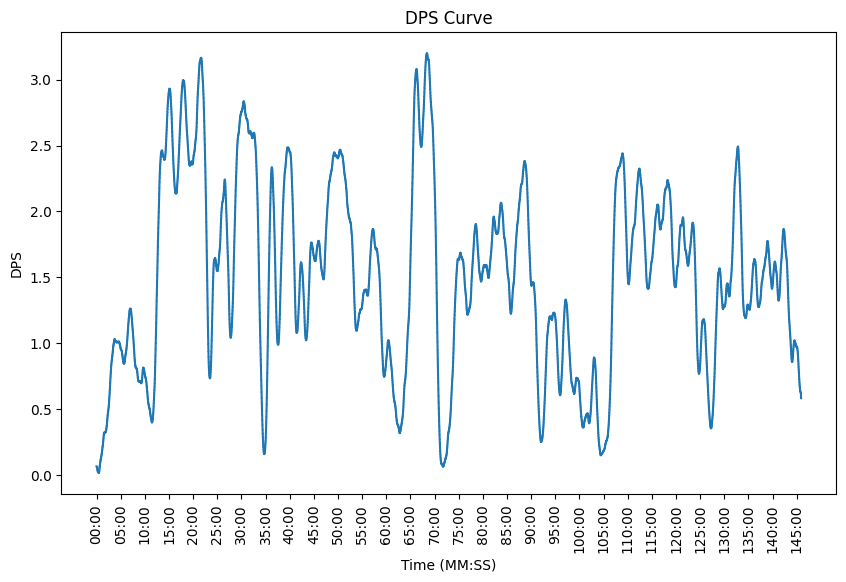

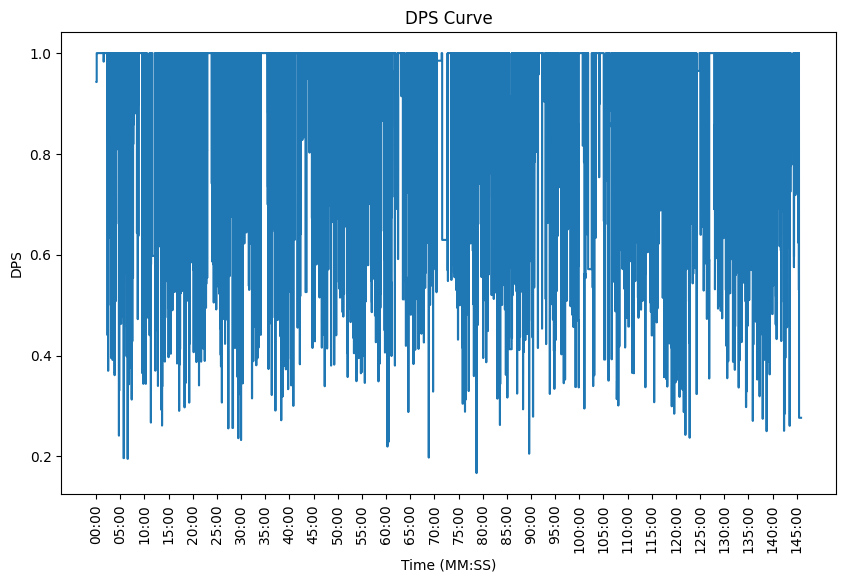

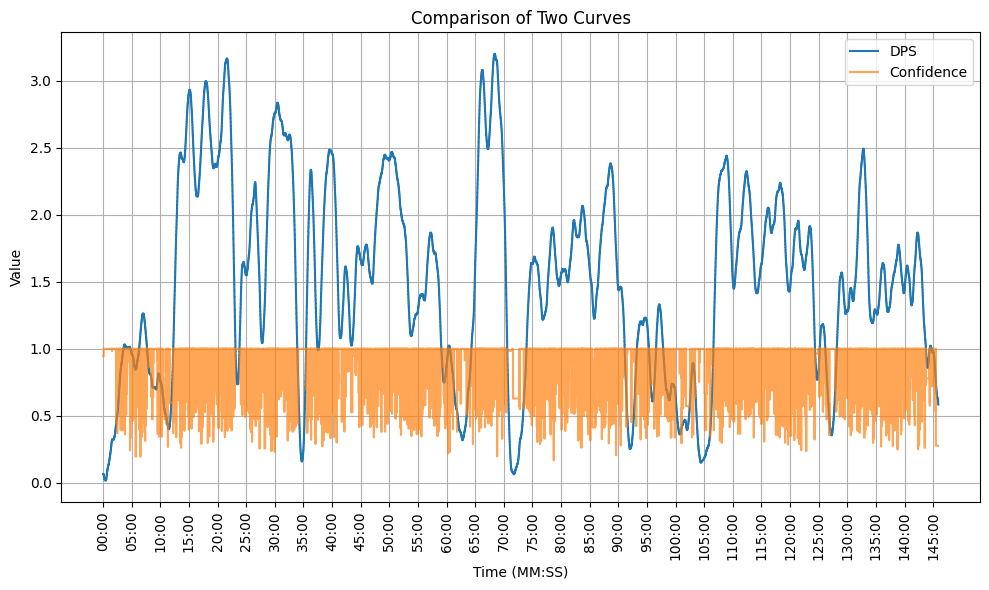

In [5]:
INDEX = 0

analysis_read = read_json(analysis_files[INDEX])
speech_recognition = dps.SpeechAnalysis(analysis_files[INDEX], fps = FPS)
dps_curve = speech_recognition.get_dps_feature_curve(WINDOW_SIZE, HOP_SIZE)

print(f"Raw curve num frames: {speech_recognition.raw_curve[0].shape}")
print(f"Media length: {analysis_read['media_length']}")
print(f"Media length in frames: {analysis_read['media_length'] * FPS}")
print(f"DPS feature curve shape: {dps_curve.shape}")

utils.display_curve(dps_curve, "time", FPS, DISPLAY_INTERVAL)
utils.display_curve(speech_recognition.confidence_curve, "time", FPS, DISPLAY_INTERVAL)

utils.display_two_curves(dps_curve, speech_recognition.confidence_curve, "DPS", "Confidence", "time", FPS, DISPLAY_INTERVAL)